## Run model from api

In [ ]:
from pathlib import Path
import os
import gprMax
from toolboxes.GPRAntennaModels.GSSI import antenna_like_GSSI_1500

# File path for output

model_name = '/GSSI_1500_antenna_Bscan'
fn = str(Path().resolve()) +  model_name

# Discretisation
dl = 0.001

# Domain
x = 0.250
y = 0.250
z = 0.220

scene = gprMax.Scene()

title = gprMax.Title(name='GSSI_1500_antenna_Bscan')
domain = gprMax.Domain(p1=(x, y, z))
dxdydz = gprMax.Discretisation(p1=(dl, dl, dl))
time_window = gprMax.TimeWindow(time=6e-9)

scene.add(title)
scene.add(domain)
scene.add(dxdydz)
scene.add(time_window)

# Import antenna model and add to model
ant_pos = (0.125, 0.094, 0.100)
gssi_objects = antenna_like_GSSI_1500(ant_pos[0], ant_pos[1], ant_pos[2], resolution=dl)
for obj in gssi_objects:
    # obj.rotate('z', 90, origin=(ant_pos[0], ant_pos[1], ant_pos[2]))
    scene.add(obj)

gv1 = gprMax.GeometryView(
    p1=(0, 0, 0), p2=(x, y, z), dl=(dl, dl, dl), filename="antenna_like_GSSI_1500", output_type="n"
)
gv2 = gprMax.GeometryView(
    p1=(ant_pos[0] - 0.170 / 2, ant_pos[1] - 0.108 / 2, ant_pos[2] - 0.050),
    p2=(ant_pos[0] + 0.170 / 2, ant_pos[1] + 0.108 / 2, ant_pos[2] + 0.010),
    dl=(dl, dl, dl),
    filename="antenna_like_GSSI_1500_pcb",
    output_type="f",
)

scene.add(gv1)
# scene.add(gv2)

# Run model
gprMax.run(scenes=[scene], geometry_only=False, outputfile=fn, gpu='0')

## Plot A-scan

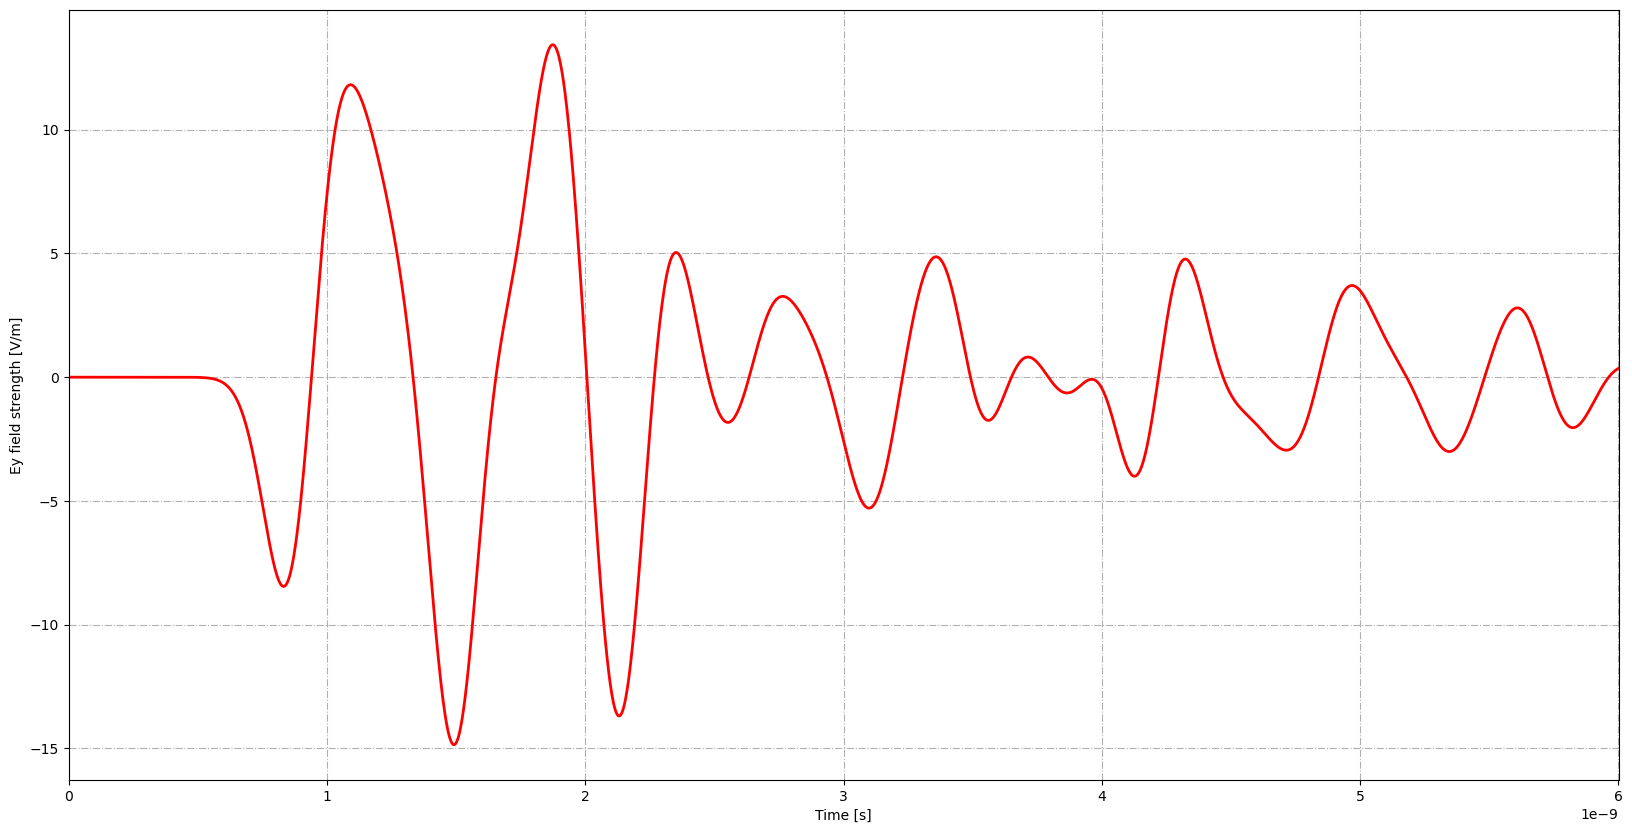

In [10]:
import gprMax
from toolboxes.Plotting.plot_Ascan import mpl_plot

outputs = ['Ey']
plt = mpl_plot("GSSI_1500_antenna_Bscan.h5", outputs, fft=False)

## Plot 3D modelled geometry


gprMax version: 4.0.0b0


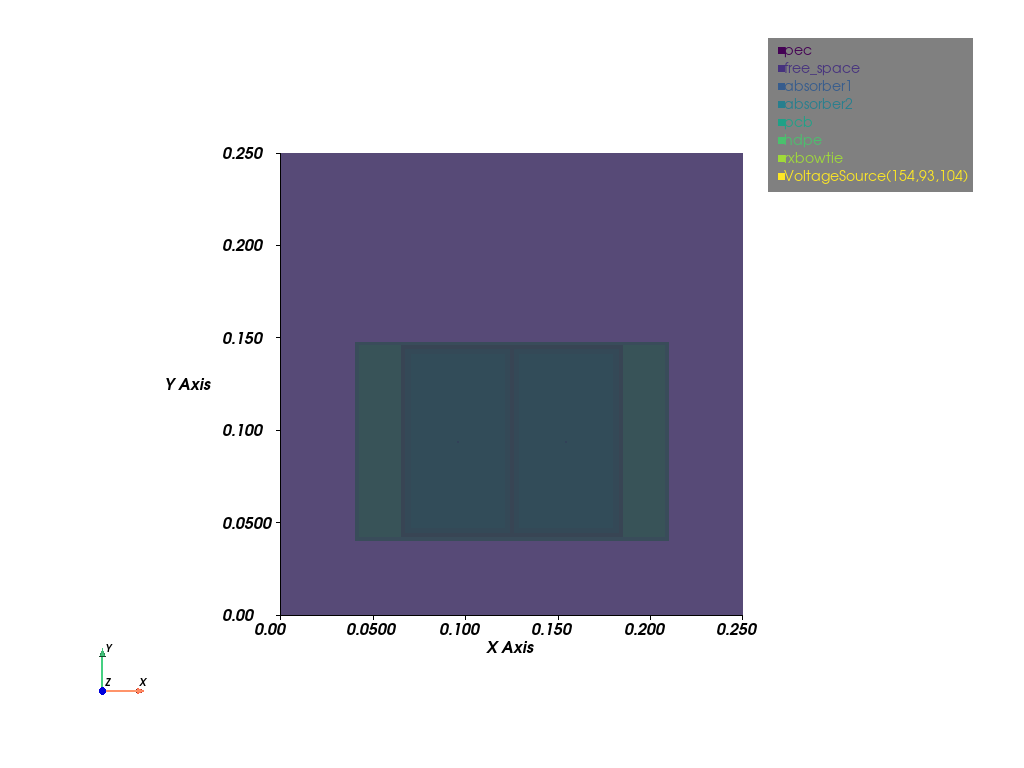

In [2]:
from toolboxes.Plotting.visualization_toolbox.plot_3D_model import visualize_vti_output

visualize_vti_output(filename = "antenna_like_GSSI_1500.vti", orientation="xy", opacity = 0.6, backend = 'static')